<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Probability and Counting

Week 2 | 4.1 


---

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Understand and solve problems using classical, frequentist, and bayesian probability 
- Understand and solve counting problems using permutations and combinations 

### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Be able to code basic python syntax
- Be comfortable using packages

### INSTRUCTOR PREP
*Before this lesson, instructors will need to:*
- Review Learning Objectives 
- Review problems discussed during lesson

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
from math import factorial
%matplotlib inline

## Probability


Because the fundation of statistics is probability, it is wise to first understand probability and its different versions. 


### Probability Axioms

---

**First Axiom**

Probabilities are non-negative, real numbers. The lowest probability possible is zero, and probability cannot be infinite.

**Second Axiom**

The probability of the sample space $S$ of events is one:

### $$ P(S) = 1 $$

**Third Axiom**

The probability of two _mutually exclusive_ events, here denoted $E_1$ and $E_2$, is equal to the sum of their individual probabilities:

### $$ P(E_1 \cup E_2) = P(E_1) + P(E_2) $$

This is also known as additivity.

This axiom can be understoon as say "the probability of either event E_1 or event E_2 occuring is the same as the probability of both occuring."

### Random Variables

A random variable (usually denoted as **X** ) is a variable that is assigned a random value. In other words, we don't know the value of the variabel until we check its value. Also, evey time we check its value we expect it's value to randomly change from one value to another. 

Let's go through some probability examples in order to better understand random variables. 

## 1. Classical probability

---

<div style="font-size:25px">
\\[P(X=x) = \frac{\text{n number of x outcomes}}{\text{total possible outcomes in event space S}}\\]
</div>

<br>
<div style="font-size:18px">


**Defned as:** The probability of x occuring is equal to the the numer of times that event x happens divided by the number of total possible outcomes. 
</div>

Classical probability is an assessment of **possible** outcomes of elementary events. Elementary events are assumed to be equally likely.

The set up to a classical probability problem is as follows:

**Experiment** any action or process that generates observations

**Sample Space** the set of all possible outcomes **S**

**Event** a subset of the sample space **X**, where **X** is a random variable

Let's go through some examples to better understand how to apply these ideas. 

### Ex One. Tossing 2 Coins

What is the probability of tossing 2 coins and getting head twice?

**Experiment** toss 2 coins

**Sample Space** S = {HH, HT, TH, TT}

**Event** Getting head twice, x = HH 

$$P(X= HH) = \frac{\text{# of two head outcomes }}{\text{# total possible outcomes}}  = ~?~ $$

In [9]:
def get_prob_for_two_coins(x):
    '''Get probability that event x happens'''
    
    # define sample space by include all possible outcomes
    sample_space = ["HH", "HT", "TH", "TT"]
    
    # numerator is cuonts the numer of times that event x happens
    numerator = len([event for event in sample_space if event in x])
    
    # demoninator is the number of total possible outcomes
    demoninator = len(sample_space)
    
    # prob of event x happening 
    P_X = numerator/ demoninator
    
    return P_X
    

In [24]:
#get_prob_for_two_coins()

In [ ]:
# Explore other outcomes


### Ex Two. Rolling a Fair Die

What is the probability of rolling an even number?

**Experiment** roll a die

**Sample Space** S = {1,2,3,4,5,6}

**Event** Getting an even number, x = 2 or 4 or 6




$$P( X = 2 ~\text{or} ~4~ \text{or} ~6) = \frac{\text{# of even outcomes}}{\text{# total possible outcomes}}  = ~?~$$

In [21]:
def get_prob_for_die_roll(x):
    '''Get probability that event X happens'''
    
    # define sample space by include all possible outcomes
    sample_space = [1, 2, 3, 4, 5, 6]
    
    # numerator is cuonts the numer of times that event x happens
    numerator = len([event for event in sample_space if event in x])
    
    # demoninator is the number of total possible outcomes
    demoninator = len(sample_space)
    
    # prob of event x happening 
    P_X = numerator/ demoninator
    
    return P_X

In [25]:
#get_prob_for_die_roll()

In [ ]:
# Explore other outcomes

### You Try

What is the probability of tossing 3 coins and getting 2 heads and 1 tails in any order? In order words, what is the probability of getting the events **HHT** or **HTH** or **THH**  

In your notebook:

1. Write down what you think the experiment, sample space (S), and event x is for this example.
2. Write a function that will output the probability just as we did in example one and two. 

**Hint:** You should be able to reuse the function in either example, but you do need to input the possible events in the sample space yourself. 

**Experiment ** ?

**Sample Space** S = ?

**Event** x = ?

$$P(X=?) = \frac{\text{# x outcomes}}{\text{# possible outcomes}} = ?$$

In [ ]:
# type your answer here

### Classical Probability Summery

In Classical probability, all we really need to do in order assign a probability to a future event is:

1. Have an understanding of all possible outcomes (the event space)
2. Counting the number of outcomes that interst us
3. Then divide both numbers.

In [ ]:
# have student volunteer to share their answer, slack their answer to me
# have them explain their answer in front of the class 

### 2. Frequentist probability

---

<div style="font-size:25px">
\\[P(X=x | ~\text{some condition}) =  \frac{\text{# times x has occurred}}{\text{# independent and identical trials}}\\]
</div>

<br>
<div style="font-size:18px">
**Defined as:** The probability of x occuring (given that the codition is true) is equal to the the number of times that the event x happens divided by the total number of independent and identical outcomes. 
</div>


Unlike classical probability, frequentist probability is an EMPIRICAL definition. It is an objective statement desribing events that have occurred in the real world.

In order to assign a probability to an event we must:

1. Go out into the world and execute an experiment
2. Make measurements of some kind 
3. Collect data
4. Return to our computers and calculate the probability of some event happening based on the data that we can collected. 

You can think of frequentist probability as classical probability **plus empiricism**. However, unlike classical probability, we have to be very careful in our experimental design to **ensure that the following conditions are met**:

1. Events occur independent of each other
2. Trails/experiments used to measure events are all identical 
3. Randomization is built into the experiment - otherwise our random variable is not random. 

In order to better understand frequentist probability let's go through an example. 

### Male Heights Experiment

We are interested in finding the frequentist probability that an American male is 6 ft tall, so we conduct an experiment. We travel the United states and: 

1. Randomly approach one million males and measure their heights - this ensures that events (measing height) are independent of each other. 
2. Always measure people's heights using the same measuring tape and between the hours of 9 am and 5 pm - this ensures that the experiments are identical. 

Consider the following cases: 

#### Case 1.

1. The first male we measure is 6 feet tall. 
2. We go back to our computers, calculate the frequentist probability that a male is 6 ft tall, and get a probability of 100%

$$P(X= \text{6 ft}~ |~\text{ male}) =  \frac{\text{# of 6 ft   males measured}}{\text{total # of measurements}} = \frac{1}{1} = 100\%$$


Can we trust this result?

In [1]:
# switch cell to Markdown mode and write your answer here

#### Case 2.

1. We measure 100 males and none are 6 feet tall. 
2. We go back to our computers, calculate the frequentist probability that a male is 6 ft tall, and get a probability of 0%

$$P(X= \text{6 ft}~ |~\text{ male})=  \frac{\text{# of 6 ft males measured}}{\text{total # of measurements}} = \frac{0}{100} = 0\%$$


Can we trust this result?

In [2]:
# switch cell to Markdown mode and write your answer here

#### Case 3.

1. We measure 1,000,000 males and 100,000 are 6 feet tall. 
2. We go back to our computers, calculate the frequentist probability that a male is 6 ft tall, and get a probability of 10%

$$P(X= \text{6 ft}~ |~\text{ male}) =  \frac{\text{# of 6 ft males measured}}{\text{total # of measurements}} = \frac{100,000}{1,000,000} = 10\%$$


Can we trust this result?

In [57]:
# switch cell to Markdown mode and write your answer here

### Sample Size: how many samples is enough?

In [ ]:
# switch cell to Markdown mode and write your answer here

In order to help cement the idea of why sample size is important let's run through a simulation. 

Image that we don't actually know what the probabiliy is for getting heads or tails, so we start fliping a coin. 

In [110]:
def get_prob_for_coin_flip(num_events):
    '''Get probability of getting heads on a coin flip for a given number of flips'''
    # create dataframe with empty cells (i.e. no values)
    df = pd.DataFrame(index = range(1,num_events), columns=['P(heads)','P(tails)']) 

    # initialize variables
    heads = 0
    tails = 0
    tries = 0

    while tries < num_events:

        tries += 1
        # randomly sample between values 1 and 2 to simulate a coin flip 
        coin = random.randint(1, 2)

        # if heads
        if coin == 1:
            heads += 1
            df.loc[tries, 'P(heads)'] = heads/tries
            df.loc[tries, 'P(tails)'] = tails/tries

        # if tails
        if coin == 2:
            tails += 1
            df.loc[tries, 'P(tails)'] = tails/tries
            df.loc[tries, 'P(heads)'] = heads/tries


    Num_Heads = heads
    Num_Tails = tails

    Prob_Heads = Num_Heads/tries
    Prob_Tails = Num_Tails/tries
    
    return df.values.T[1]


In [111]:
num_events = 10000
results = get_prob_for_coin_flip(num_events)

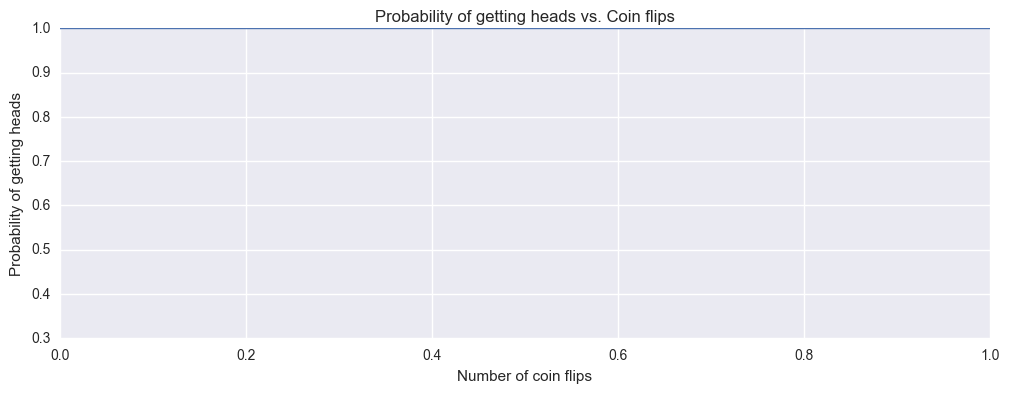

In [117]:
plt.figure(figsize = (12,4))
plt.plot(results)
plt.title("Probability of getting heads vs. Coin flips")
plt.ylabel("Probability of getting heads");
plt.xlabel("Number of coin flips")
#plt.xlim(0,1)
plt.show()


<div style="font-size:25px">
\\[P(X=x | ~\text{some condition}) =  \lim_{n \rightarrow \infty}  \frac{\text{# times x has occurred}}{\text{# independent and identical trials}}\\]
</div>

### Frequentist Probability Summery

We can see from the male height and coin flip examples, that the frequentist probability of an event happening is strongly dependent on the number of events that are recorded. If we have too few recorded events, we get one value for the probability of an event. As we record more and more events, we see that the value for the probability of an event fluxuates, but tends to converge to a single number. For this reason, we tend to approach the true probability as the number of samples **n** approaches infinity (i.e. taking more samples leads to more reliable results).

###### Sample Size

When applying Frequentist probability, we need to collected enough samples to be confident in our resulting probability. How we go about quantifying what "enough samples" is requires that we speak about [Type 1 and Type 2 errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) . A topic that we will cover in the hypothesis testing lesson.

### Check for Understanding
--------

<details><summary>
Explain why we can or can't trust the results from each individual case study
</summary>
Because frequentist probabilities are based on the data that we collected, it is important to collect as much data as we can in order to ensure that our sample population is representative of the true population. The more data that we collect, the more confident we can be that our probabilities accurately reflect the true population.
<br>
**Case 1:** Although we seem to get a conclusive answer, basing any probabilities on a single data point is highly  unreliable. Also, we know from experimence that not all males in the United States are 6 feet tall. 
<br>
**Case 2:** Although we have collected more data, our result (zero probability) means that there are no males in the United States that are 6 feet tall, which is clearly false. 
<br>
**Case 3:** By measuring the height of one million males, we can be confident that our answer more accurately reflects the height distribution of the entire adult male population in the united states. Keep in mind, that we still need to formally, and quantitatively, define just how many measurements is enough to trust our result. 

--------

### 3. Bayesian probability

---

<div style="font-size:25px">
\\[ P(A|B) = \frac{\text{P(B|A)}\cdot \text{P(A)}}{\text{P(B)}} \\]
</div>

<br>
<div style="font-size:18px">
**Definded as:** The posterior probability of event B happening, given that event A has occured, is equal to the likelihood of event A happening, given that event B has occured, all divided by the total probability that event A happening. 
</div>


Bayesian probability gives us an updated probability that something is true based on new obsverations. Unlike classical or frequentist probability, bayesian probability incorporates our prior belief $\text{P(A)}$ that something is true into the probability model. 

![](https://nflinjuryanalyticscom.files.wordpress.com/2016/12/bayes-rule-e1350930203949.png)

Bayesian probability gives us an updated probability that something is true based on new obsverations. Unlike classical or frequentist probability, bayesian probability incorporates our prior belief $\text{P(A)}$ that something is true into the probability model. 

Let's look at the reformation of Bayes Law in the colored image above. 

**Hypothesis: H** Our hypothesis that we want to determine a probability for how true it is

**Evidence: e** The data/evidence that we have collected in order to help determine how likely our hypothesis is true

**Prior Probability: P(H)** The probability that our hypothesis is true before we make any measurements

**Likelihood Probability: P(e|H)** The probability that our hypothesis is true based on the data that we have collected (i.e. if the hypothesis was true, how likely is it that we would see the data what we see)

**Posterior Probability: P(H|e)** The updated probability that our hypothesis is true given the probability we initially assigned to it and the probability that we would see the evidence that we have collected it our hypothesis was true. 

**Marginal Probability: P(e)** Probability that the evidence is true given under all cases (i.e. if the hypothesis is true and if it is false). Mathematically, this is used as a normalization term. 

### Male Height Probelm Revisted

In the male height problem, we assume that the condition that all height measurements were done for males (and they were). But what if we are forced to design an experiment in which we don't actually know if the person whos height we are measuring is male or female and our goal was to determine the probability that this person was a male based on the measurement?

Using frequentist probability, we can't actually address that problem because frequentist have to assume that a hypothesis is true, they don't have a way of incorporating uncertainty into their model -- but bayesian do!


In the male height problem we were calculating the likelihood that we get the data that we get (measuremetns are 6 feet) assuming that the hypothesis is true (that all measurments are done on males) 

$$ \text{Likelihood}~~ P(X= \text{6 ft}~ |~\text{ male})$$

In the case that we don't know if the person being measured is male or female, bayesian can quantify their uncertainty with the prior probability:

$$\text{Prior}~~P(male) = P(\text{person is a male}) = 0.5$$

Leading to a probability that takes uncertainty into account and allowing us to address this problem. 

$$ P(\text{male}~|~6 \text{ft})   = \frac{P(X= \text{6 ft}~ |~\text{ male})~~P(\text{male}) } {P(~X= \text{6 ft}) }  $$


## Examples 

<br>
<div style="font-size:25px">
\\[ P(A|B) = \frac{\text{P(B|A)}\cdot \text{P(A)}}{\text{P(B)}} \\]
</div>
<br>

### Ex. One 

A family has two children. Given that one of the children is a boy, what is the probability that both children are boys?



In [ ]:
# draw out the probability tree

### Ex. Two

Bag one contains 4 white and 6 black balls while another Bag two contains 4 white and 3 black balls. One ball is drawn at random from one of the bags and it is found to be black. Find the probability that it was drawn from Bag one.

In [ ]:
# have students draw out the probability tree, then do it in class

## Expected Values

---

>The expected value of a random variable, intuitively, is the long-run average value of repetitions of the experiment it represents. -Wikipedia


$$ E[X] = \sum_{i = 1}^{n}{x_{i}p_{i}} = \sum_{x} x\cdot P(X=x) $$


$x\cdot P(X=x)$ think of this expression as the event **x** times the probability of that event happening $P(X=x) = p_{x}$

You might also see the expected value in the following form:

$$ E[X] = \sum_{i = 1}^{n}{x_{i}p_{i}} = x_{1}p_{1} + x_{2}p_{2} + \cdot \cdot \cdot+ x_{n}p_{n}  $$


The final expression is the **weighted average** of the random variable **X**. The weights are the probabilities for each event, **x**. We say that it is weighted because the influnce that each outcome has is dependent on it probability. 

#### Ex. Weighted Average 

Let's say we have a fixed die that has a weight inserted into it so that the probability of rolling a 1 is 50% and the probability of rolling any other number is 10%. 

**Question: **What is the average value we expect to get from this fixed die?

This questions can be rephrase as saying, if I roll the die an infinit number of times, what is the average value?

$$ E[X] = \sum_{i = 1}^{n}{x_{i}p_{i}} = 1 (0.5) + 2 (0.10) + 3 (0.10) + 4 (0.10) + 5 (0.10) + 6 (0.10) = 2.5$$


In [208]:
def expected_value_die(num_rolls):
    '''Get expected value for a fixed die'''
    
    sample_space = [1,2,3,4,5,6]
    weights = [0.5,0.1,0.1,0.1,0.1,0.1]
    events = np.zeros(num_rolls)
    expected_value = []
    
    roll = 1
    for i, _ in  enumerate(xrange(num_rolls)):
        event = np.random.choice(sample_space, size=1,p=weights)[0]
        events[i] = event
        expected_value.append(np.sum(events)/roll)
        roll += 1
        

    return expected_value

In [1]:
# num_rolls = 10
# expected_val_fixed = expected_value_die(num_rolls)
# expected_val_fixed[-1]

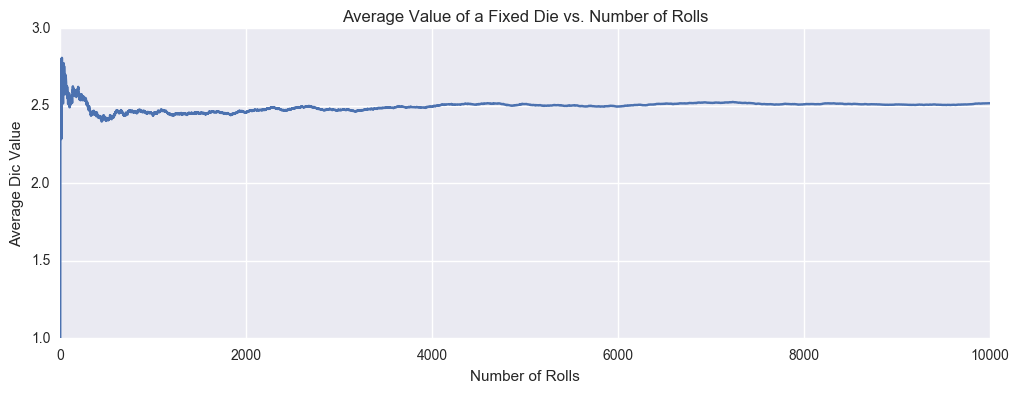

In [210]:
plt.figure(figsize=(12,4))
plt.title("Average Value of a Fixed Die vs. Number of Rolls")
plt.xlabel("Number of Rolls")
plt.ylabel("Average Dic Value")
plt.plot(expected_val_fixed);

 ### Ex. Simple Average 
 
A simple average is the case in which all events are equally likely, such as fliping a fair coin or rolling a fair die. Since all probabilities are equal (all weights are the same) that means that we can rewrite the formula for the expecte value. 

$$ E[X] = \sum_{i = 1}^{n}{x_{i}p_{i}} = x_{1}p_{1} + x_{2}p_{2} + \cdot \cdot \cdot+ x_{n}p_{n}  $$
 
 
$$ E[X] = \sum_{i = 1}^{n}{x_{i}p_{i}} =\frac{ x_{1}p_{1} + x_{2}p_{2} + \cdot \cdot \cdot+ x_{n}p_{n}}{1}  $$


**Recall: ** $p_{1} + x_{2} + \cdot \cdot \cdot+ p_{n} = n\cdot p = 1$

$$ E[X] =\frac{ x_{1}p_{1} + x_{2}p_{2} + \cdot \cdot \cdot+ x_{n}p_{n}}{p_{1} + x_{2} + \cdot \cdot \cdot+ p_{n}}  $$

**Factor out all the p's**

$$ E[X] = \frac{p}{n\cdot p}( x_{1} + x_{2} + \cdot \cdot \cdot+ x_{n})   $$

$$ E[X] = \frac{1}{n}\sum_{i = 1}^{n}{x_{i}}  $$

**Note: ** The expectation value for events with equal probability is called the mean and denoted by $\mu$. (Yes, the same mean that we are all familiar with). 


$$ E[X] = \mu = \frac{1}{n}\sum_{i = 1}^{n}{x_{i}}  $$


The average value of rolling a fair die an infinite number of times: 

$$ E[X] = \frac{1}{n}\sum_{i = 1}^{n}{x_{i}} = 1 \frac{1}{6} + 2 \frac{1}{6} + 3 \frac{1}{6} + 4 \frac{1}{6} + 5 \frac{1}{6} + 6 \frac{1}{6} = 3.5$$

In [160]:
def expected_value_die(num_rolls):
    '''Get expected value for a fair die'''
    
    # define sample space by include all possible outcomes
    sample_space = [1, 2, 3, 4, 5, 6]
    
    events = np.zeros(num_rolls)
    expected_value = []
    
    roll = 1
    for i, _ in  enumerate(xrange(num_rolls)):
        event = random.randint(1,6)
        events[i] = event
        expected_value.append(np.sum(events)/roll)
        roll += 1
        

    return expected_value

In [161]:
num_rolls = 10000
expected_val = expected_value_die(num_rolls)
expected_val[-1]

3.5097999999999998

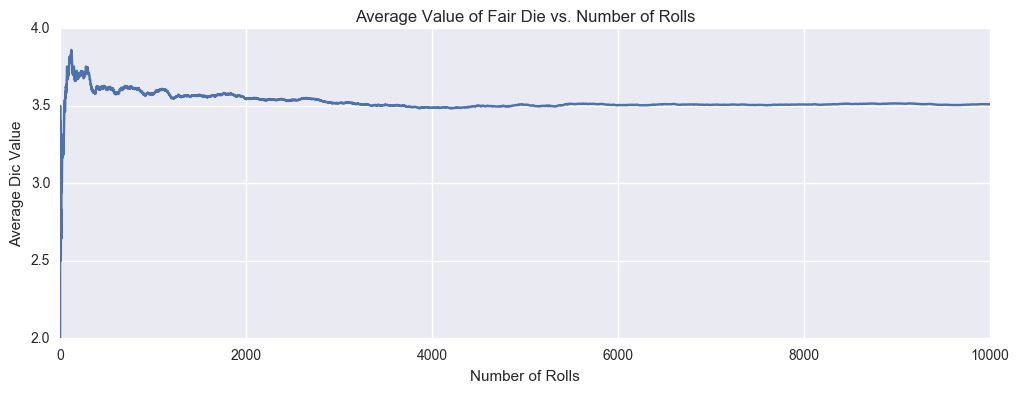

In [162]:
plt.figure(figsize=(12,4))
plt.title("Average Value of Fair Die vs. Number of Rolls")
plt.xlabel("Number of Rolls")
plt.ylabel("Average Dic Value")
plt.plot(expected_val);

In [ ]:
# response

<a id='counting_principle'></a>

# Counting Principle

---

Counting, combinations, and permutations are essential to understanding probability. The counting principal says that:

If $A$ can occur in $n$ ways 

and $B$ can occur in $m$ ways

then $A$ and $B$ can occur in $n * m$ ways.

**Q: If you have two groups of students, 10 freshman and 11 sophmores, how many teams of 2 can be formed with one member from each class?**

In [ ]:
teams_of_2 = 10 * 11
teams_of_2

<a id='permutation'></a>

### Permutations

---

A permutation is an arragement of objects where the order is important, or in other words, a permutation is the number of arrangements that are possible.

With a set of items of size $n$ and arrangements of length $k$, the permutations are calculated as

### $$ \text{permutations}(n, k) = n * (n - 1) * (n - 2) \; ... \; (n - k + 1)$$

which is 0 when $k > n$

**Q: There are 5 qualified candidates to fill 3 positions.  How many ways can the roles be filled assuming 1 person per position?**

In [ ]:
cands  = 5 * 4 * 3
cands

### The factorial function

---

The factorial function is defined as 

### $$ n! = n * (n-1) * (n-2) \; ... \; (n-1) $$

and is an important part of permutations. When $n = k$, permutations of $n$ in $k$ arrangements is equivalent to $n!$

The permutation function can be rewritten using factorials:

### $$  \text{permutations}(n, k) = \frac{n!}{(n-k)!} $$

**Q: If there are 9 players on a baseball team, how many possibilities are there for the first 3 players in the batting lineup?**

In [ ]:
print factorial(9)/factorial(9-3)

<a id='combination'></a>

### Combinations

---

Like permutations, combinations are arrangements of objects, but in the case of combinations the order of the objects does not matter.

With a set of items of size $n$ and arrangements of length $k$, the combinations are calculated as

### $$ \text{combinations}(n, k) = \frac{ \text{permutations}(n,k) }{ \text{permutations}(k, k) } = \frac{n!}{(n-k)!k!}$$

An intuitive way to think about this is that we take the number of permutations, then we divide by the number of possible orderings we could have in the available slots $k$.

**Q: How many possible 5 card hands are there with a deck of 52 cards?**

In [ ]:
print factorial(52) / (factorial(52-5) * factorial(5))

# Lab

## Classical probability and expectation values 

The exercises for classical probability and expectation values will be completed at Brilliant.org.

1. Create a free account at [Brilliant.org](brilliant.org/)
2. Navigate to the Math for Quantitative Finance section
3. Complete the Probability and Expected Value modules 




## Bayes Therom

<br>
<div style="font-size:20px">
\\[ P(A|B) = \frac{\text{P(B|A)}\cdot \text{P(A)}}{\text{P(B)}} \\]
</div>
<br>

For these problems, be sure to understand and apply the formula correctly. Once you assign values to the various probability variables, all you have to do is plug in the values. 

I strongly recommend that you draw and label a probability tree for each problem (on paper or a white board). Probability trees will help you reason though the problem, help you understand conditional probability, and figure out the values that go in the demoninator (i.e. the marginal probability)

### Problem 1

A disease test is advertised as being 99% accurate: if you have the disease, you will test positive 99% of the time, and if you don't have the disease, you will test negative 99% of the time. If 1% of all people have this disease and you test positive, what is the probability that you actually have the disease?

In [211]:
# your answer here: answer is 50%

### Problem 2

You go to see the doctor about an ingrowing toenail. The doctor selects you at random to have
a blood test for swine flu, which for the purposes of this exercise we will say is currently suspected
to affect 1 in 10,000 people in Australia. The test is 99% accurate, in the sense that the probability
of a false positive is 1%. The probability of a false negative is zero. You test positive. What is the
new probability that you have swine flu?

### Problem 2 continued

Now imagine that you went to a friend’s wedding in Mexico recently, and (for the purposes of this
exercise) it is know that 1 in 200 people who visited Mexico recently come back with swine flu.
Given the same test result as above, what should your revised estimate be for the probability you
have the disease?

[Solution for Problem Two](http://www.maths.uq.edu.au/courses/MATH3104/Lectures/goodhill/bayes_solutions.pdf)

## Counting

You'll need to figure out if permutations or combinations are used to solve each problem. 

### Problem 1

If there are 9 players on a baseball team, how many possibilities are there for the first 3 players in the batting lineup?



In [ ]:
factorial(9) / factorial(9-3)


### Problem 2 

How many possible 5 card hands are there with a deck of 52 cards?

In [ ]:
factorial(52) / (factorial(52-5) * factorial(5))

**Q: What is the probability that you are dealt 2 cards and they turn out to both be aces from a 52-card deck?**

In [ ]:
# set up permutation and combination functions:
def perm(n, k):
    return float(factorial(n)) / factorial(n-k)

def comb(n, k):
    return float(perm(n, k)) / perm(k, k)

In [ ]:
# Find the number of different 2-ace hands you can have:
ace_hands = comb(4,2)

# find the number of possible 2-card hands you can have from the deck:
hands = comb(52,2)

print ace_hands / hands

A restaurant has 22 employees, including:

- 6 chefs
- 5 waiters
- 7 busboys 

The owner has requested a few things from you the manager:

1. A private party is coming on Tuesday and wants to know how many teams of 1 chef and 2 waiters can be formed?
2. Each busboy works just one day of the week. He wants to know how many different versions of the weekly busboy assignments there can be. 
3. He wants his favorite waiter to serve him and his wife for their anniversary on Sunday, along with 2 other waiters.  How many teams of 3 waiters can serve him?

In [ ]:
# 1:
chefs = 6
waiters = 5
busboys = 7

# set up permutation and combination functions:
def perm(n, k):
    return float(factorial(n)) / factorial(n-k)

def comb(n, k):
    return float(perm(n, k)) / perm(k, k)

# first figure out how many combinations of 2 waiters there are:
waiter_combs = comb(waiters, 2)

# for each combination of waiters you have 6 possible pairings with chefs:
groups = chefs * waiter_combs

print groups

In [ ]:
# 2:
# calculate the permutations of busboys. There are 7 busboys and 
# we want to know the possible orderings of them during the week.
print perm(busboys, 7)

In [ ]:
# 3:
# We have to remove his favorite waiter, who must be present, then
# calculate the combinations.
print comb(waiters-1, 2)